In [107]:
# Preliminary
## Columnar analysis basics.
import uproot
import awkward as ak
## Plotting.
import matplotlib.pyplot as plt

# Hists
import hist
from hist import Hist

# NanoEvents
from coffea.nanoevents import NanoEventsFactory, BaseSchema
# Processors
import coffea.processor as processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

import numpy as np

In [108]:
fname   = "/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_2000_M2_1100_NANOAOD.root"

In [125]:
eventsToRead = 10000
events = NanoEventsFactory.from_root(fname,schemaclass=NanoAODSchema,metadata={"dataset": "testSignal"},entry_stop=eventsToRead).events()
events

<NanoEventsArray [<event 1:1:9901>, ... <event 1:1:2500>] type='10000 * event'>

In [126]:
events.fields

['LHEPdfWeight',
 'TrigObj',
 'Electron',
 'SoftActivityJetNjets5',
 'LHEWeight',
 'LHE',
 'SoftActivityJetNjets10',
 'HLT',
 'run',
 'L1',
 'SubGenJetAK8',
 'PSWeight',
 'DeepMETResponseTune',
 'RawPuppiMET',
 'IsoTrack',
 'Muon',
 'Pileup',
 'SoftActivityJetHT',
 'genTtbarId',
 'LHEScaleWeight',
 'GenDressedLepton',
 'SoftActivityJetHT5',
 'Tau',
 'fixedGridRhoFastjetAll',
 'luminosityBlock',
 'GenMET',
 'HTXS',
 'RawMET',
 'CorrT1METJet',
 'LHEPart',
 'FsrPhoton',
 'SoftActivityJetHT2',
 'fixedGridRhoFastjetCentralCalo',
 'event',
 'GenPart',
 'SoftActivityJetHT10',
 'L1PreFiringWeight',
 'OtherPV',
 'GenVisTau',
 'PV',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'PuppiMET',
 'HLTriggerFirstPath',
 'GenVtx',
 'CaloMET',
 'L1Reco',
 'btagWeight',
 'TkMET',
 'MET',
 'SoftActivityJetNjets2',
 'SV',
 'ChsMET',
 'GenIsolatedPhoton',
 'genWeight',
 'GenJet',
 'fixedGridRhoFastjetCentralNeutral',
 'fixedGridRhoFastjetCentral',
 'Jet',
 'Generator',
 'LHEReweightingWeight',
 'GenJetAK8',
 

In [127]:
events.FatJet.fields

['area',
 'btagCMVA',
 'btagCSVV2',
 'btagDDBvL',
 'btagDDBvLV2',
 'btagDDBvL_noMD',
 'btagDDCvB',
 'btagDDCvBV2',
 'btagDDCvB_noMD',
 'btagDDCvL',
 'btagDDCvLV2',
 'btagDDCvL_noMD',
 'btagDeepB',
 'btagHbb',
 'deepTagMD_H4qvsQCD',
 'deepTagMD_HbbvsQCD',
 'deepTagMD_TvsQCD',
 'deepTagMD_WvsQCD',
 'deepTagMD_ZHbbvsQCD',
 'deepTagMD_ZHccvsQCD',
 'deepTagMD_ZbbvsQCD',
 'deepTagMD_ZvsQCD',
 'deepTagMD_bbvsLight',
 'deepTagMD_ccvsLight',
 'deepTag_H',
 'deepTag_QCD',
 'deepTag_QCDothers',
 'deepTag_TvsQCD',
 'deepTag_WvsQCD',
 'deepTag_ZvsQCD',
 'eta',
 'mass',
 'msoftdrop',
 'n2b1',
 'n3b1',
 'particleNetMD_QCD',
 'particleNetMD_Xbb',
 'particleNetMD_Xcc',
 'particleNetMD_Xqq',
 'particleNet_H4qvsQCD',
 'particleNet_HbbvsQCD',
 'particleNet_HccvsQCD',
 'particleNet_QCD',
 'particleNet_TvsQCD',
 'particleNet_WvsQCD',
 'particleNet_ZvsQCD',
 'phi',
 'pt',
 'rawFactor',
 'tau1',
 'tau2',
 'tau3',
 'tau4',
 'lsf3',
 'jetId',
 'subJetIdx1',
 'subJetIdx2',
 'electronIdx3SJ',
 'muonIdx3SJ',
 'gen

In [128]:
ptcut  = 250
etacut = 2.5

fatjets = events.FatJet[(events.FatJet.pt>ptcut) & (np.abs(events.FatJet.eta)<etacut)]
#Collections of fatjets matching our definition of pt and eta 

trijets = fatjets[(ak.num(fatjets, axis=1) > 2)]
#Events with 3 or more fatjets

print(ak.num(trijets,axis=0))
#Number of such jets

print(ak.num(trijets,axis=1))
#Number of jets in each event


6073
[3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, ... 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3]


In [129]:
trijet_mass = (trijets[:,0]+trijets[:,1]+trijets[:,2]).mass
#calc inv mass of trijets by lorentz v. sum of three leading jets

dijet1_mass = (trijets[:,0]+trijets[:,1]).mass
#calc inv mass of first dijet combination

dijet2_mass = (trijets[:,0]+trijets[:,2]).mass
#calc inv mass of first dijet combination

dijet3_mass = (trijets[:,1]+trijets[:,2]).mass
#calc inv mass of first dijet combination

In [143]:
j3_bin = hist.axis.Regular(label="Trijet Mass [GeV]", name="trijet_mass", bins=40, start=0, stop=4000)
j3_cat = hist.axis.StrCategory(label='Trijets', name='trijet', categories=["signal"])#can add bkg categories later on

In [144]:
j3_hist = Hist(j3_bin, j3_cat)

In [145]:
j3_hist.fill(trijet="signal", trijet_mass=trijet_mass)

Hist(
  Regular(40, 0, 4000, name='trijet_mass', label='Trijet Mass [GeV]'),
  StrCategory(['signal'], name='trijet', label='Trijets'),
  storage=Double()) # Sum: 6044.0 (6073.0 with flow)

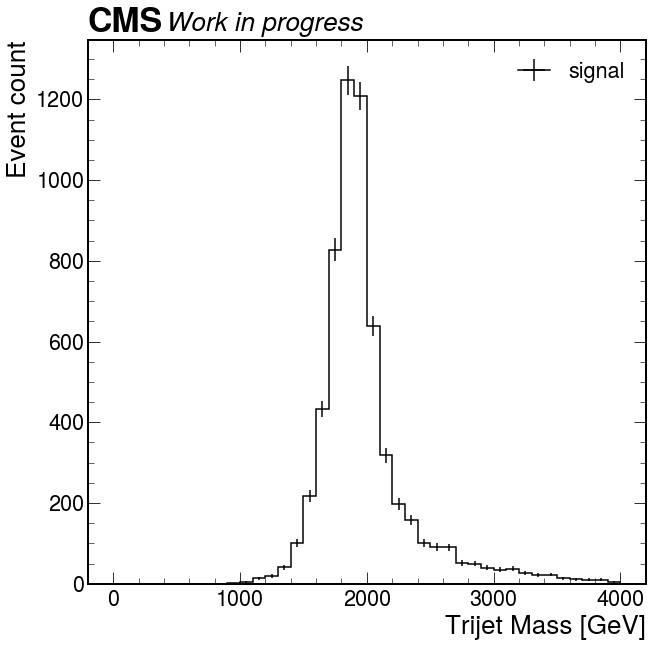

In [147]:
import mplhep as hep
plt.style.use([hep.style.CMS])
j3_hist.plot(color="black")
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count",horizontalalignment='right', y=1.0)
plt.legend()

In [152]:
j2_bin = hist.axis.Regular(label="Dijet Mass [GeV]", name="dijet_mass", bins=40, start=0, stop=2000)
j2_cat = hist.axis.StrCategory(label='Dijets', name='dijet', categories=["Pair1","Pair2","Pair3"])

In [153]:
j2_hist = Hist(j2_bin, j2_cat)

In [154]:
j2_hist.fill(dijet="Pair1", dijet_mass=dijet1_mass)
j2_hist.fill(dijet="Pair2", dijet_mass=dijet2_mass)
j2_hist.fill(dijet="Pair3", dijet_mass=dijet3_mass)

Hist(
  Regular(40, 0, 2000, name='dijet_mass', label='Dijet Mass [GeV]'),
  StrCategory(['Pair1', 'Pair2', 'Pair3'], name='dijet', label='Dijets'),
  storage=Double()) # Sum: 17813.0 (18219.0 with flow)

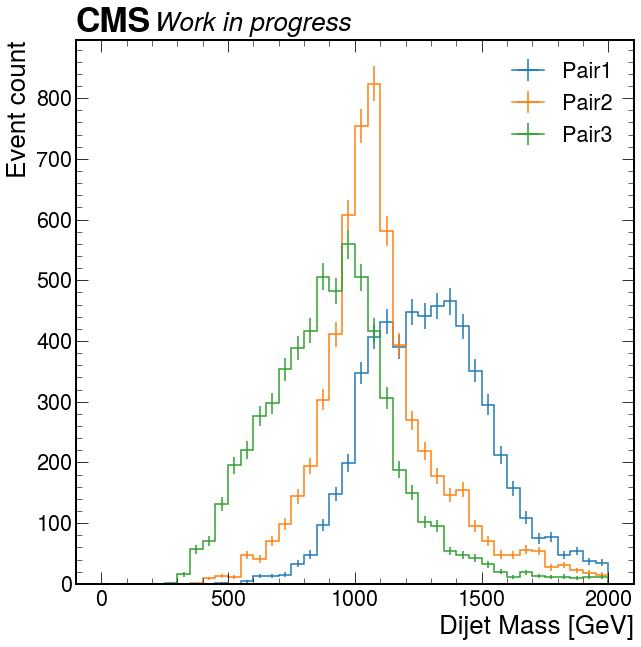

In [156]:
j2_hist.plot()
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count",horizontalalignment='right', y=1.0)
plt.legend()